In [5]:
import pandas as pd
import numpy as np

# from sklearn import preprocessing
from sklearn import impute 
from sklearn import linear_model

from sklearn.model_selection import cross_val_predict

In [6]:
# Plotting with GG style
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

Edellisen harjoituksen data, airbnb Berlin.

In [7]:
df = pd.read_csv('data.csv', low_memory=False)
df.shape

(24397, 107)

In [8]:
df.head()

,Unnamed: 0,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0.0,1944,https://www.airbnb.com/rooms/1944,2.019071e+13,2019-07-11,cafeheaven Pberg/Mitte/Wed for the summer 2019,"Private, bright and friendly room. You'd be sh...","The room is very large, private, cozy, bright,...","Private, bright and friendly room. You'd be sh...",none,...,f,f,moderate,f,f,1.0,0.0,1.0,0.0,0.25
1,1.0,2015,https://www.airbnb.com/rooms/2015,2.019071e+13,2019-07-11,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,...,f,f,moderate,f,f,4.0,4.0,0.0,0.0,3.18
2,2.0,3176,https://www.airbnb.com/rooms/3176,2.019071e+13,2019-07-11,Fabulous Flat in great Location,This beautiful first floor apartment is situa...,1st floor (68m2) apartment on Kollwitzplatz/ P...,This beautiful first floor apartment is situa...,none,...,f,f,strict_14_with_grace_period,f,f,1.0,1.0,0.0,0.0,1.18
3,3.0,3309,https://www.airbnb.com/rooms/3309,2.019071e+13,2019-07-11,BerlinSpot Schöneberg near KaDeWe,First of all: I prefer short-notice bookings. ...,"Your room is really big and has 26 sqm, is ver...",First of all: I prefer short-notice bookings. ...,none,...,f,f,strict_14_with_grace_period,f,f,1.0,0.0,1.0,0.0,0.38
4,4.0,6883,https://www.airbnb.com/rooms/6883,2.019071e+13,2019-07-11,Stylish East Side Loft in Center with AC & 2 b...,NaN,Stay in a stylish loft on the second floor and...,Stay in a stylish loft on the second floor and...,none,...,f,f,moderate,f,t,1.0,1.0,0.0,0.0,1.08


Haetaa osa arviot jotka vaikuttavat arvioon

In [10]:
df = df[['review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','review_scores_rating']]
df.head()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating
0,9.0,8.0,9.0,9.0,9.0,8.0,82.0
1,10.0,9.0,10.0,10.0,10.0,9.0,93.0
2,9.0,9.0,9.0,9.0,10.0,9.0,93.0
3,9.0,9.0,9.0,10.0,9.0,9.0,89.0
4,10.0,10.0,10.0,10.0,10.0,10.0,99.0


In [11]:
df.isnull().sum()

review_scores_accuracy         4949
review_scores_cleanliness      4946
review_scores_checkin          4967
review_scores_communication    4951
review_scores_location         4966
review_scores_value            4969
review_scores_rating           4923
dtype: int64

Poistetaan rivit joista puuttuu kaikki arvot, joissa ei ole numeroita.

In [14]:
# Drop rows where all are nan
df.dropna(axis=0, how='all', inplace=True)
df.isnull().sum()

review_scores_accuracy         26
review_scores_cleanliness      23
review_scores_checkin          44
review_scores_communication    28
review_scores_location         43
review_scores_value            46
review_scores_rating            0
dtype: int64

Riveiltä joista puuttuu osa arvoista korvataan puuttuvat arvot sarakkeen keskiarvoilla, voisi olla helpompikin tapa jos nolla niin korvataan keskiarvolla. Sijoitetaan uuteen df:n imputoidut arvot ja katsotaan puuttuko arvoja.

In [15]:
# Impute median value for original missing values and generate new dataframe
imputer = impute.SimpleImputer(strategy='median')
df_imp = pd.DataFrame(imputer.fit_transform(df))
df_imp.columns = df.columns
df_imp.index = df.index
df_imp.isnull().sum()

review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
review_scores_rating           0
dtype: int64

In [16]:
lr = linear_model.LinearRegression()

Ennustetaan asunnon arvo, muiden arvioiden perusteella.

In [18]:
y = df_imp.review_scores_rating
X = df_imp.drop(columns='review_scores_rating')

In [19]:
predict = cross_val_predict(lr, X, y, cv=10)

Lineaarinen suhde ennustetun ja toteutuneen välillä.

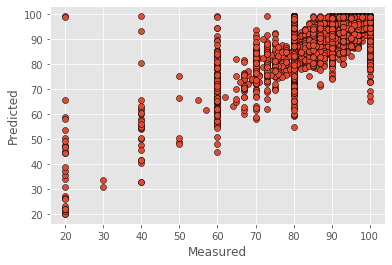

In [21]:
fig, ax = plt.subplots()
ax.scatter(y, predict, edgecolors=(0, 0, 0))
# ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [22]:
df.corr()

,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,review_scores_rating
review_scores_accuracy,1.000000,0.516205,0.493970,0.525464,0.365999,0.592371,0.652529
review_scores_cleanliness,0.516205,1.000000,0.372106,0.393601,0.290301,0.525481,0.662984
review_scores_checkin,0.493970,0.372106,1.000000,0.620623,0.322856,0.442234,0.515734
review_scores_communication,0.525464,0.393601,0.620623,1.000000,0.340715,0.484041,0.577248
review_scores_location,0.365999,0.290301,0.322856,0.340715,1.000000,0.415528,0.412786
review_scores_value,0.592371,0.525481,0.442234,0.484041,0.415528,1.000000,0.686586
review_scores_rating,0.652529,0.662984,0.515734,0.577248,0.412786,0.686586,1.000000


In [23]:
dir(lr)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_decision_function',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_preprocess_data',
 '_set_intercept',
 'copy_X',
 'fit',
 'fit_intercept',
 'get_params',
 'n_jobs',
 'normalize',
 'predict',
 'score',
 'set_params']

Regressiosuora seaborn kirjaston avulla

In [24]:
# Visualizing the predicted and real values with Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

In [25]:
df_visual = pd.DataFrame({'Measured': y, 'Predicted': predict})
df_visual.head()

,Measured,Predicted
0,82.0,84.501183
1,93.0,94.334359
2,93.0,89.915447
3,89.0,91.103342
4,99.0,99.172582


Mitattu (y) vs ennustettu (x, huom. luotettavuusväli (lineaarin ympärillä oleva hämärä väri) 

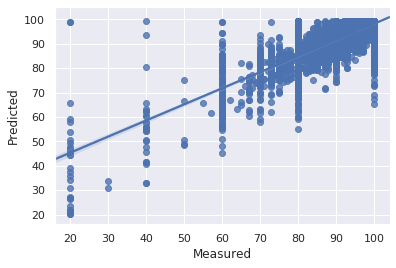

In [26]:
sns.regplot(x="Measured", y="Predicted", data=df_visual);